<a href="https://colab.research.google.com/github/Tiziri-k/SIC-exercices/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve

In [ ]:
df = pd.read_csv('heart.csv')
df.shape


(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

# **Visualisation**

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True, cmap='Blues')

In [ ]:
m=list(zip(df['sex'][df.target==0].value_counts(),df['sex'][df.target==1].value_counts()))
fig = plt.figure(figsize=(9,8),dpi=144)
ax1 = fig.add_subplot(121)
ax1.pie(m[0], labels=['male','female'], autopct='%1.1f%%', startangle=90)
plt.title('Heart disease patients devided by sex')
ax2 = fig.add_subplot(122)
ax2.pie(m[1], labels=['male','female'], autopct='%1.1f%%', startangle=90)
plt.title(' A non Heart disease patients devided by sex')


In [ ]:
fig= plt.figure(figsize=(12,7))
sns.histplot(df['age'][(df['target']==0) & (df['sex']==1)],edgecolor='black')
sns.histplot(df['age'][(df['target']==0) & (df['sex']==0)],color='red',edgecolor='black')
plt.legend(['male','female'])
plt.title('Heart disease patients devided by sex and age', fontsize=20)

Text(0.5, 1.0, 'Heart disease patients devided by fbs( blood sugar)')

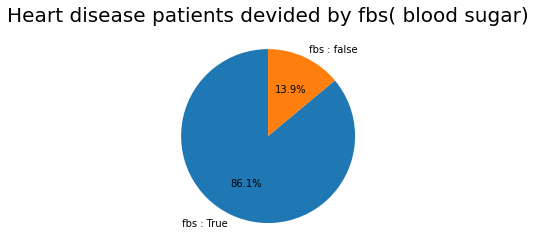

In [ ]:
l=list(df['fbs'][df.target==1].value_counts())
plt.pie(l, labels=['fbs : True','fbs : false'], autopct='%1.1f%%', startangle=90)
plt.title('Heart disease patients devided by fbs( blood sugar)', fontsize=20)


# **Logistic regression**

In [ ]:
scale_DF = preprocessing.StandardScaler()
Scale_coloumns = ['age','trestbps',	'chol',	'thalach','oldpeak'	]
df[Scale_coloumns] = scale_DF.fit_transform(df[Scale_coloumns])
df.head()

In [ ]:
y= df.target
x = df.drop('target', axis=1 )


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 


In [ ]:
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


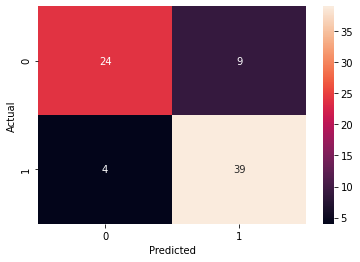

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
y_pred_proba =logreg.predict_proba(x_test)[:,1]
False_pr, true_pr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0, 0.5, 'true Positive')

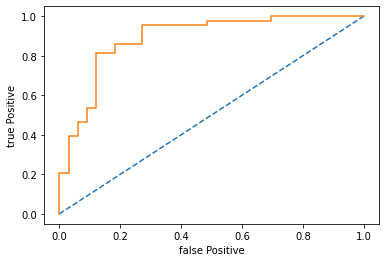

In [ ]:
plt.plot([0,1],[0,1],'--')
plt.plot(False_pr, true_pr)
plt.xlabel('false Positive')
plt.ylabel('true Positive')
# att [0,0] the thresholds(p) == 1  which mean False_positive = True positive= 0
# att [1,1] the thresholds(p) == 0  which mean False_positive = True positive
